In [290]:
import pandas as pd
import numpy as np
import missingno as msno

In [291]:
df = pd.read_csv('cs_bisnode_panel.csv')

In [292]:
df.head(5)

,comp_id,begin,end,COGS,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,...,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg
0,1001034.0,2005-01-01,2005-12-31,NaN,692.592590,7266.666504,7574.074219,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
1,1001034.0,2006-01-01,2006-12-31,NaN,603.703674,13122.222656,12211.111328,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
2,1001034.0,2007-01-01,2007-12-31,NaN,425.925934,8196.295898,7800.000000,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
3,1001034.0,2008-01-01,2008-12-31,NaN,300.000000,8485.185547,7781.481445,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
4,1001034.0,2009-01-01,2009-12-31,NaN,207.407410,5137.037109,15300.000000,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,0.083333


In [293]:
df = df.drop(columns=['COGS', 'finished_prod', 'net_dom_sales', 'net_exp_sales', 'wages', 'D'])

In [294]:
df.dtypes

comp_id                 float64
begin                    object
end                      object
amort                   float64
curr_assets             float64
curr_liab               float64
extra_exp               float64
extra_inc               float64
extra_profit_loss       float64
fixed_assets            float64
inc_bef_tax             float64
intang_assets           float64
inventories             float64
liq_assets              float64
material_exp            float64
personnel_exp           float64
profit_loss_year        float64
sales                   float64
share_eq                float64
subscribed_cap          float64
tang_assets             float64
balsheet_flag             int64
balsheet_length           int64
balsheet_notfullyear      int64
year                      int64
founded_year            float64
exit_year               float64
ceo_count               float64
foreign                 float64
female                  float64
birth_year              float64
inoffice

<Axes: >

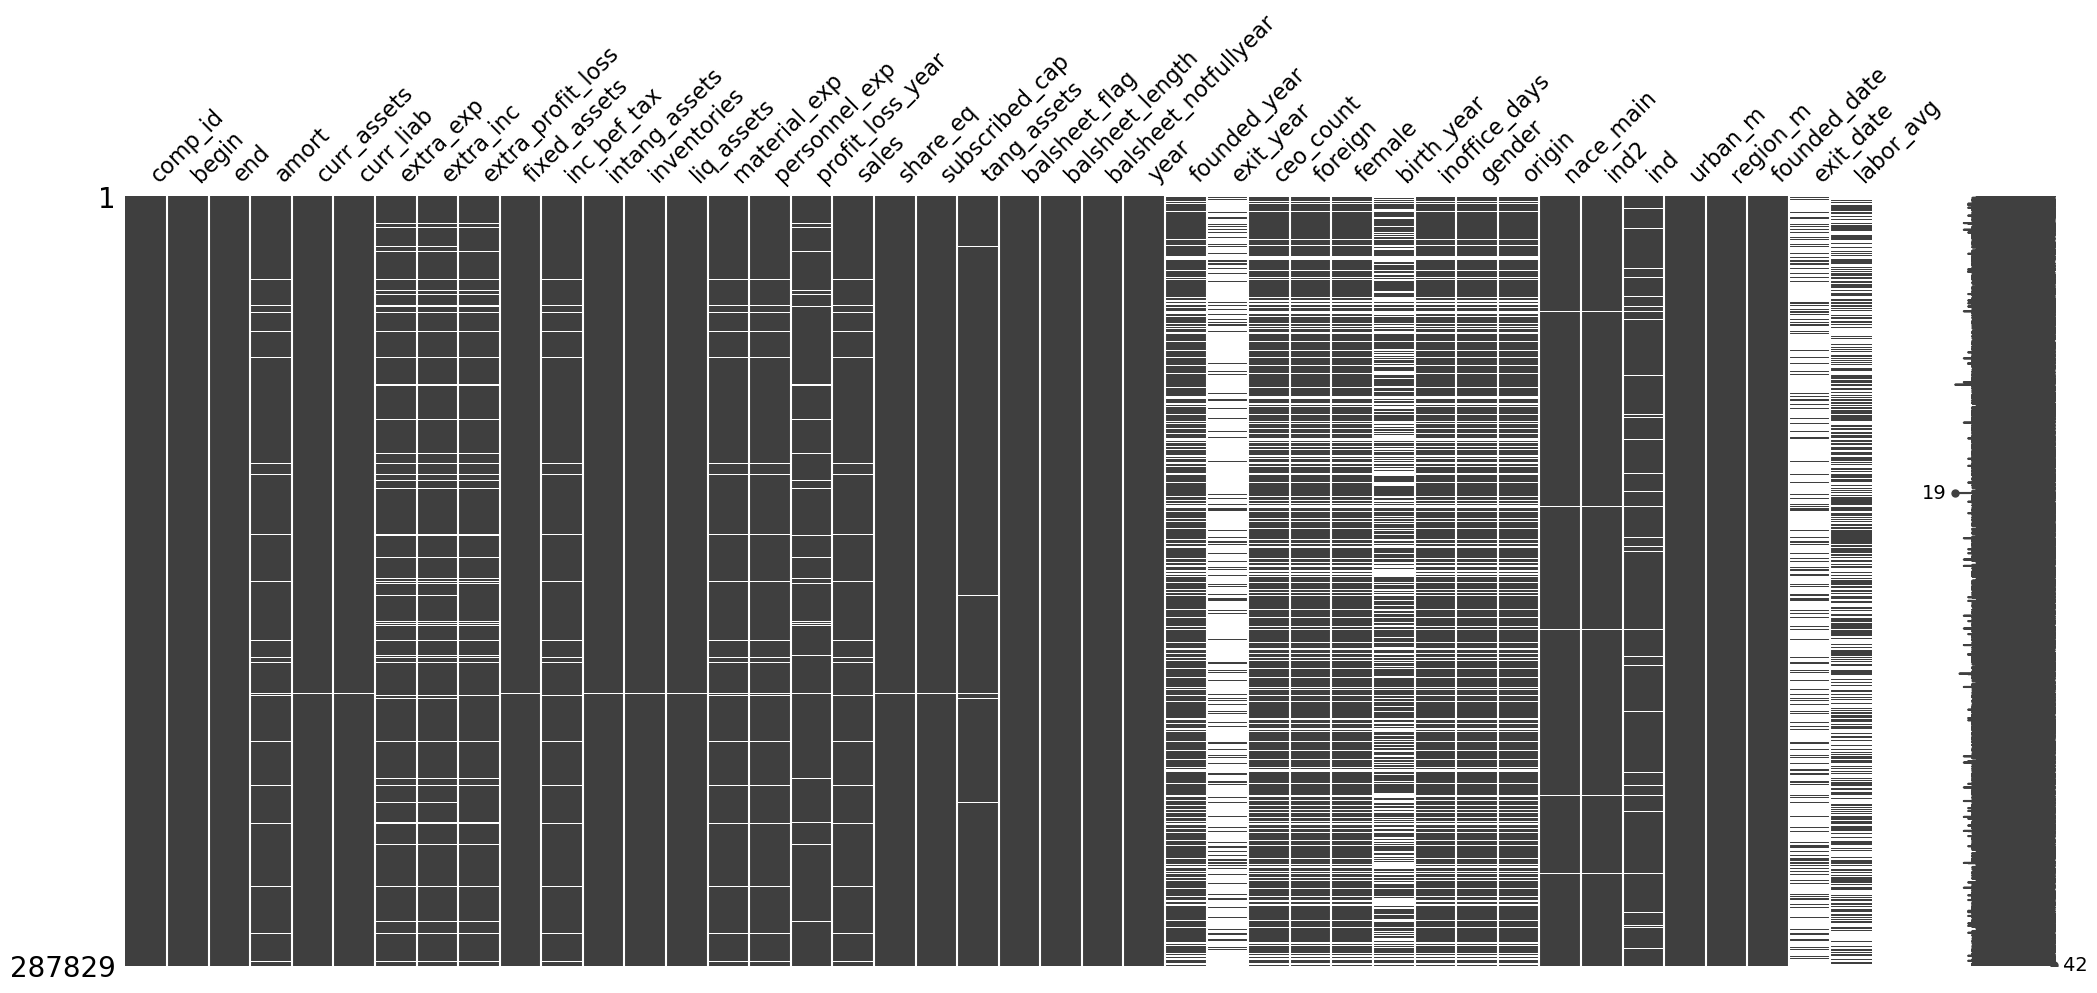

In [295]:
msno.matrix(df)

In [296]:
#df_filter = df.loc[df['year'] != 2016]
#df_filter = df.query("year != 2016")
df_filter = df[df['year'] != 2016]

In [297]:
df_filter[df_filter['year'] == 2016]

,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,...,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg


Será preciso criar uma coluna da variável dependente que será objeto da predição.
Para isso, use o conceito de que uma empresa deixou de operar se ela esteve ativa no
ano X, mas não apresentou vendas em X + 2 anos.

In [298]:
df_group = df_filter.groupby(['comp_id','year']).sum()[['sales']]

df_group.head(20)

sales
comp_id   year               
1001034.0 2005   62751.851562
          2006   64625.925781
          2007   65100.000000
          2008   78085.187500
          2009   45388.890625
          2010    9929.629883
          2011       0.000000
          2012       0.000000
          2013       0.000000
          2014       0.000000
          2015       0.000000
1001541.0 2009     925.925903
          2010       0.000000
          2011       0.000000
          2012    1203.703735
          2013    5555.555664
          2014    4888.888672
          2015    4888.888672
1002029.0 2007  347588.875000
          2008  827214.812500

In [299]:
df_group = df_group.reset_index()

df_group = df_group.sort_values(by=['comp_id', 'year'])

In [300]:
def marcador_inatividade(group):
    vendas_ocorridas = group[group['sales'] > 0]

    if not vendas_ocorridas.empty:
        ultimo_ano_venda = vendas_ocorridas['year'].max()

        anos_inatividade = group[(group['year'] > ultimo_ano_venda) & (group['year'] <= ultimo_ano_venda + 2)]
        if len(anos_inatividade) == 2 and (anos_inatividade['sales'] == 0).all():
            group['status'] = 'Inactive'
        else:
            group['status'] = 'Active'
    else:
        group ['status'] = 'Inactive'
    return group

df_atv = df_group.groupby('comp_id').apply(marcador_inatividade).reset_index(drop=True)

print(df_atv)




             comp_id  year         sales    status
0       1.001034e+06  2005  62751.851562  Inactive
1       1.001034e+06  2006  64625.925781  Inactive
2       1.001034e+06  2007  65100.000000  Inactive
3       1.001034e+06  2008  78085.187500  Inactive
4       1.001034e+06  2009  45388.890625  Inactive
...              ...   ...           ...       ...
278081  4.641209e+11  2011    288.888885  Inactive
278082  4.641209e+11  2012      0.000000  Inactive
278083  4.641209e+11  2013      0.000000  Inactive
278084  4.641209e+11  2014      0.000000  Inactive
278085  4.641209e+11  2015      0.000000  Inactive

[278086 rows x 4 columns]


/tmp/ipykernel_32459/3460073521.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_atv = df_group.groupby('comp_id').apply(marcador_inatividade).reset_index(drop=True)


In [301]:
df = df_filter

df = pd.merge(df, df_atv[['comp_id', 'year', 'status']], on=['comp_id', 'year'], how='left')

df

,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,...,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg,status
0,1.001034e+06,2005-01-01,2005-12-31,692.592590,7266.666504,7574.074219,0.0,0.0,0.0,1229.629639,...,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN,Inactive
1,1.001034e+06,2006-01-01,2006-12-31,603.703674,13122.222656,12211.111328,0.0,0.0,0.0,725.925903,...,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN,Inactive
2,1.001034e+06,2007-01-01,2007-12-31,425.925934,8196.295898,7800.000000,0.0,0.0,0.0,1322.222168,...,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN,Inactive
3,1.001034e+06,2008-01-01,2008-12-31,300.000000,8485.185547,7781.481445,0.0,0.0,0.0,1022.222229,...,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN,Inactive
4,1.001034e+06,2009-01-01,2009-12-31,207.407410,5137.037109,15300.000000,0.0,0.0,0.0,814.814819,...,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,0.083333,Inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278081,4.641209e+11,2011-01-01,2011-12-31,0.000000,1807.407349,3.703704,0.0,0.0,0.0,0.000000,...,Domestic,5510.0,55.0,3.0,2,East,1990-08-22,NaN,NaN,Inactive
278082,4.641209e+11,2012-01-01,2012-12-31,0.000000,1518.518555,96.296295,0.0,0.0,0.0,0.000000,...,Domestic,5510.0,55.0,3.0,2,East,1990-08-22,NaN,NaN,Inactive
278083,4.641209e+11,2013-01-01,2013-12-31,0.000000,988.888916,77.777779,0.0,0.0,0.0,0.000000,...,NaN,5510.0,55.0,3.0,2,East,1990-08-22,NaN,NaN,Inactive
278084,4.641209e+11,2014-01-01,2014-12-31,0.000000,644.444458,233.333328,0.0,0.0,0.0,0.000000,...,Domestic,5510.0,55.0,3.0,2,East,1990-08-22,NaN,NaN,Inactive


In [302]:
#validação


df_val = df.groupby('status')['comp_id'].nunique()

df_val

status
Active      38265
Inactive     8147
Name: comp_id, dtype: int64

In [303]:
df = df[df['founded_year'] == 2012 ]
df

,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,...,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg,status
259,1.327409e+06,2013-01-01,2013-12-31,0.000000,14862.962891,28466.666016,0.0,0.0,0.0,0.000000,...,Domestic,5630.0,56.0,3.0,3,Central,2012-02-26,2016-08-18,0.333333,Active
332,1.680873e+06,2012-12-10,2012-12-31,0.000000,811.111084,0.000000,0.0,0.0,0.0,0.000000,...,Foreign,5630.0,56.0,3.0,3,Central,2012-11-29,NaN,NaN,Active
333,1.680873e+06,2013-01-01,2013-12-31,0.000000,907.407410,3333.333252,0.0,0.0,0.0,0.000000,...,Foreign,5630.0,56.0,3.0,3,Central,2012-11-29,NaN,0.166667,Active
334,1.680873e+06,2014-01-01,2014-12-31,0.000000,33.333332,7366.666504,0.0,0.0,0.0,2222.222168,...,Foreign,5630.0,56.0,3.0,3,Central,2012-11-29,NaN,0.283333,Active
335,1.680873e+06,2015-01-01,2015-12-31,0.000000,33.333332,7451.852051,0.0,0.0,0.0,0.000000,...,Foreign,5630.0,56.0,3.0,3,Central,2012-11-29,NaN,NaN,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277421,4.618393e+11,2012-09-13,2012-12-31,0.000000,2066.666748,2855.555664,0.0,0.0,0.0,0.000000,...,Domestic,5610.0,56.0,3.0,2,Central,2012-08-15,NaN,0.083333,Active
277422,4.618393e+11,2013-01-01,2013-12-31,0.000000,140.740738,537.037048,0.0,0.0,0.0,0.000000,...,Domestic,5610.0,56.0,3.0,2,Central,2012-08-15,NaN,0.145833,Active
277995,4.638292e+11,2013-01-01,2013-12-31,74.074074,444.444458,4837.037109,0.0,0.0,0.0,266.666656,...,Domestic,5630.0,56.0,3.0,3,Central,2012-07-04,NaN,NaN,Inactive
277996,4.638292e+11,2014-01-01,2014-12-31,74.074074,440.740753,4837.037109,0.0,0.0,0.0,192.592590,...,Domestic,5630.0,56.0,3.0,3,Central,2012-07-04,NaN,NaN,Inactive


In [304]:
df['sales'] = np.where(df['sales'] < 0, 0, df['sales'])

/tmp/ipykernel_32459/3135500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sales'] = np.where(df['sales'] < 0, 0, df['sales'])


In [305]:
df['sales']

259       52500.000000
332          40.740742
333        4174.074219
334        6092.592773
335           0.000000
              ...     
277421     9181.481445
277422     5207.407227
277995        0.000000
277996        0.000000
277997        0.000000
Name: sales, Length: 6926, dtype: float64

In [306]:
df['Log Sales'] = np.log(df['sales'])
df['Log10 Sales'] = np.log10(df['sales'])

/home/antonio/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_32459/202535893.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Log Sales'] = np.log(df['sales'])
/home/antonio/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_32459/202535893.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [307]:
df['Log Sales'] = np.where(df['Log Sales'] < 0, 0, df['Log Sales'])
df['Log Sales'] = np.where(pd.isna(df['Log Sales']), 0, df['Log Sales'])
df['Log Sales']

/tmp/ipykernel_32459/922026198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Log Sales'] = np.where(df['Log Sales'] < 0, 0, df['Log Sales'])
/tmp/ipykernel_32459/922026198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Log Sales'] = np.where(pd.isna(df['Log Sales']), 0, df['Log Sales'])


259       10.868568
332        3.707229
333        8.336648
334        8.714829
335        0.000000
            ...    
277421     9.124944
277422     8.557837
277995     0.000000
277996     0.000000
277997     0.000000
Name: Log Sales, Length: 6926, dtype: float64

In [308]:
df['Log10 Sales'] = np.where(df['Log10 Sales'] < 0, 0, df['Log10 Sales'])
df['Log10 Sales'] = np.where(pd.isna(df['Log10 Sales']), 0, df['Log10 Sales'])
df['Log10 Sales']

/tmp/ipykernel_32459/1547221574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Log10 Sales'] = np.where(df['Log10 Sales'] < 0, 0, df['Log10 Sales'])
/tmp/ipykernel_32459/1547221574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Log10 Sales'] = np.where(pd.isna(df['Log10 Sales']), 0, df['Log10 Sales'])


259       4.720159
332       1.610029
333       3.620560
334       3.784802
335       0.000000
            ...   
277421    3.962913
277422    3.716622
277995    0.000000
277996    0.000000
277997    0.000000
Name: Log10 Sales, Length: 6926, dtype: float64

<Axes: >

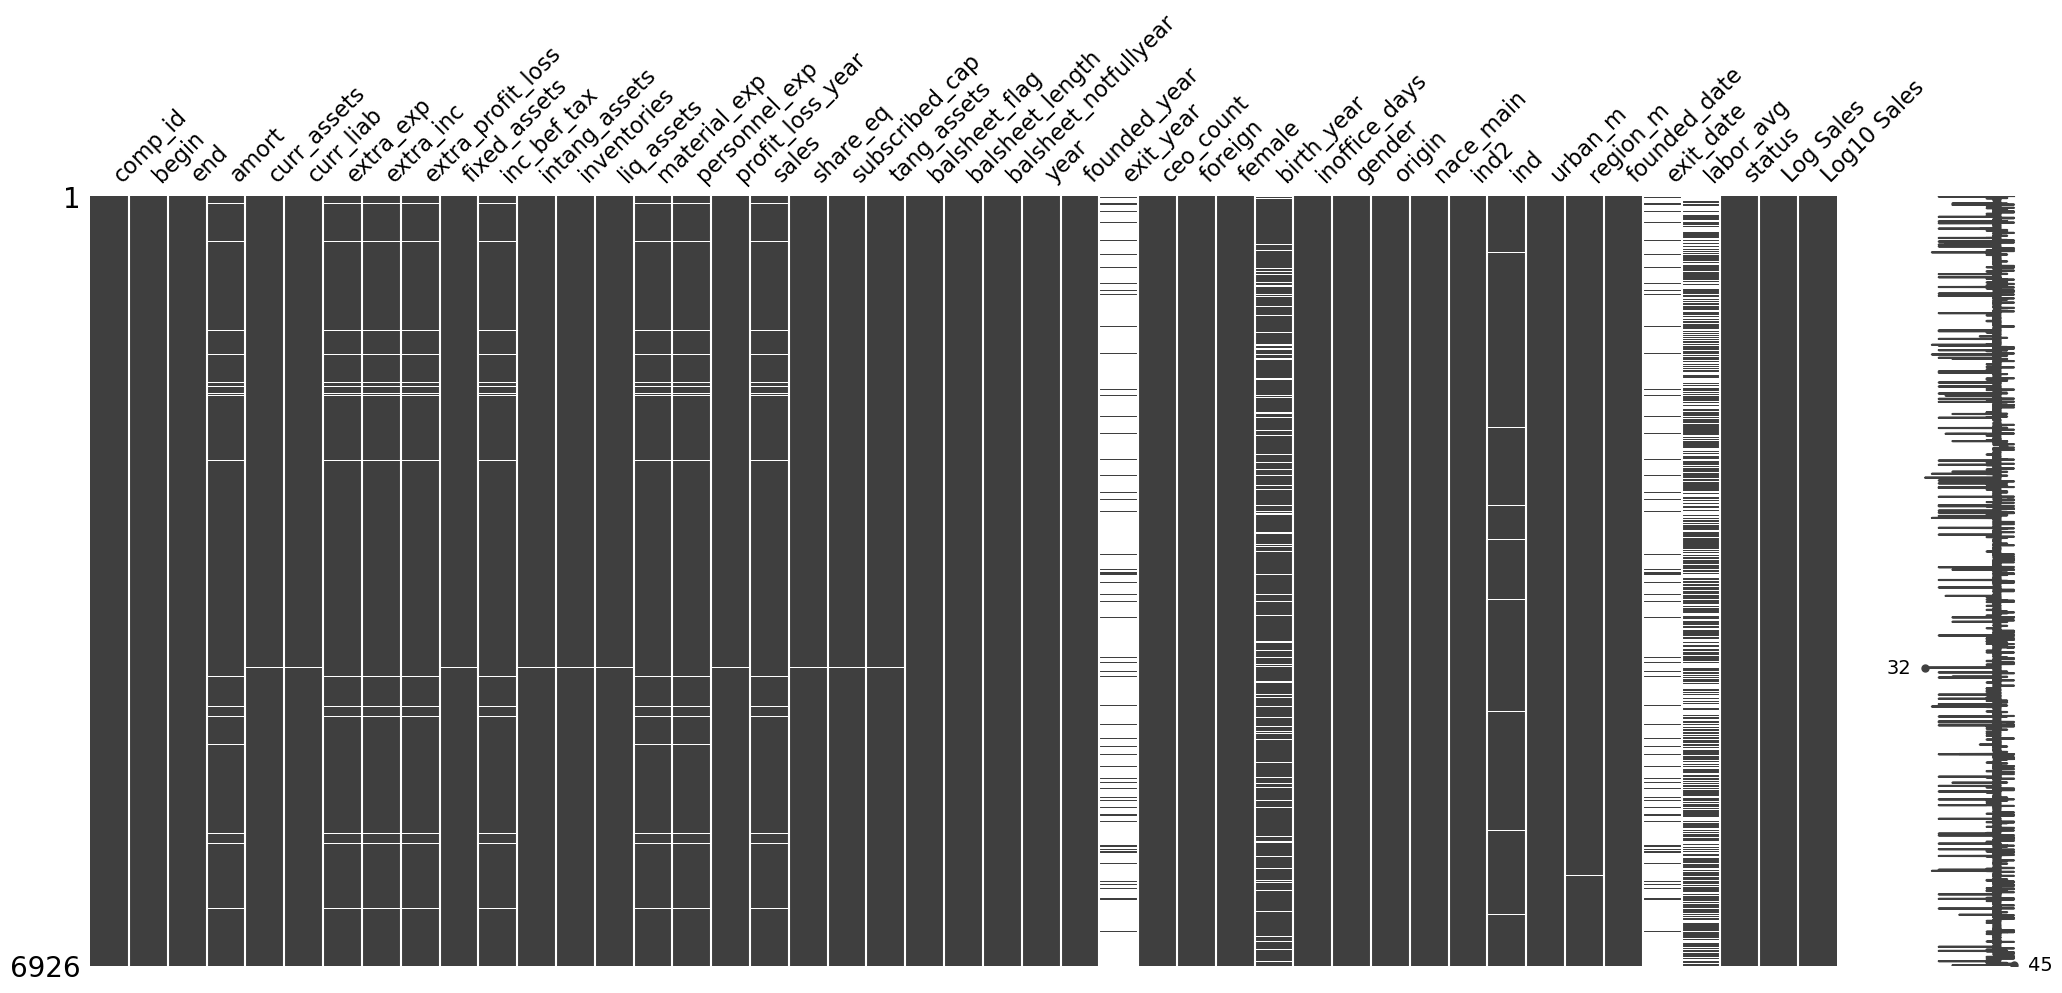

In [309]:
msno.matrix(df)

In [310]:
media_founded_year = df['founded_year'].mean()
df['founded_year'] = np.where(pd.isna(df['founded_year']), media_founded_year, df['founded_year'])

/tmp/ipykernel_32459/1230979607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['founded_year'] = np.where(pd.isna(df['founded_year']), media_founded_year, df['founded_year'])


<Axes: >

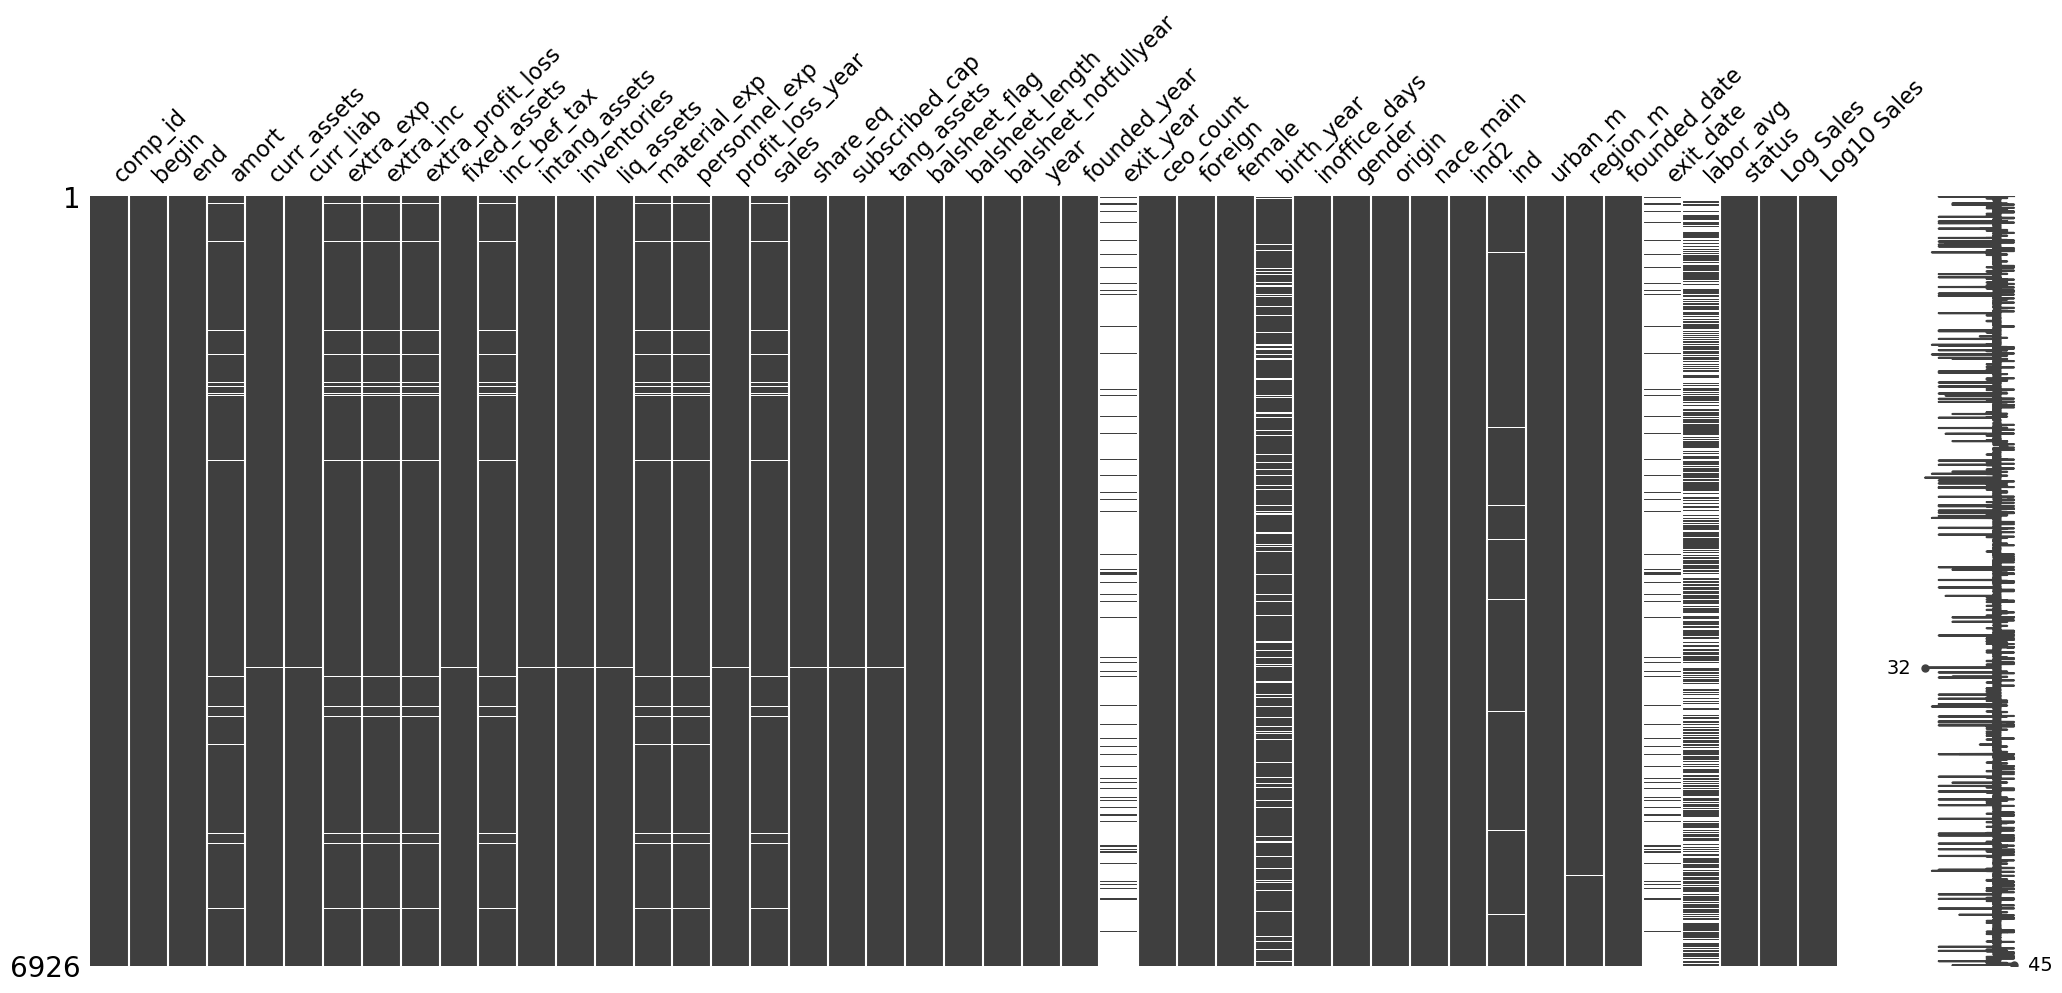

In [311]:
msno.matrix(df)

In [312]:
media_labour = df['labor_avg'].mean() 

df['labor_avg'] = np.where(pd.isna(df['labor_avg']), media_labour, df['labor_avg'])

/tmp/ipykernel_32459/3961223361.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['labor_avg'] = np.where(pd.isna(df['labor_avg']), media_labour, df['labor_avg'])


In [313]:
df['company_age'] = df['year'] - df['founded_year']
df['company_age']

/tmp/ipykernel_32459/1905227260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['company_age'] = df['year'] - df['founded_year']


259       1.0
332       0.0
333       1.0
334       2.0
335       3.0
         ... 
277421    0.0
277422    1.0
277995    1.0
277996    2.0
277997    3.0
Name: company_age, Length: 6926, dtype: float64

In [314]:
df_rev =  df.query("inc_bef_tax < 10000000")
df = df_rev
df['inc_bef_tax'].max()

4868933.5

In [315]:
df = df.query("inc_bef_tax > 1000")
df['inc_bef_tax'].min()

1003.7036743164062

In [316]:
df['Log Sales'].describe()

count    1806.000000
mean       11.187879
std         1.918305
min         0.000000
25%        10.209334
50%        11.344170
75%        12.250585
max        18.249862
Name: Log Sales, dtype: float64

In [317]:
df['Log10 Sales'].describe()

count    1806.000000
mean        4.858834
std         0.833109
min         0.000000
25%         4.433857
50%         4.926710
75%         5.320362
max         7.925814
Name: Log10 Sales, dtype: float64

In [318]:
df.to_csv('bisnode_tratado', index=False)



In [319]:
df_group = df.groupby(['year'])[['profit_loss_year','personnel_exp','labor_avg']]


In [320]:
df_group.describe()

profit_loss_year                                                          \
                count          mean            std           min          25%   
year                                                                            
2012            134.0  13979.767817   58171.071400      0.000000  1479.629669   
2013            502.0  11223.262894   31893.886042  -2103.703613  1652.777802   
2014            584.0  18881.779684   96122.785500  -9025.925781  2098.148071   
2015            586.0  27610.048339  198775.732804 -30819.125000  1814.814819   

                                             personnel_exp                ...  \
              50%           75%          max         count          mean  ...   
year                                                                      ...   
2012  2907.407471   7347.222168   525729.625         134.0  12224.599222  ...   
2013  3422.222168  10171.296631   568559.250         502.0  46653.505984  ...   
2014  4746.296387  11509.259521  1887382.000         584.0  50417.963246  ...   
2015  4420.370361  12858.333496  4110503.750         586.0  54674.338619  ...   

                               labor_avg                                \
               75%         max     count      mean       std       min   
year                                                                     
2012  14619.444580   295759.25     134.0  0.448398  0.433827  0.083333   
2013  31568.518555  3805411.00     502.0  0.644453  1.626753  0.083333   
2014  39079.628906  2595332.75     584.0  0.647311  1.409368  0.083333   
2015  42384.259766  3474801.50     586.0  0.655131  1.250801  0.083333   

                                               
           25%       50%       75%        max  
year                                           
2012  0.217014  0.454092  0.454092   3.111111  
2013  0.166667  0.454092  0.454092  26.616667  
2014  0.166667  0.434659  0.513889  17.986111  
2015  0.166667  0.440972  0.583333  19.458334  

[4 rows x 24 columns]

In [321]:
df.shape

(1806, 46)